In [1]:
import healpy as hp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
6.3**2/2-6012.010586814981 

-5992.165586814981

In [2]:
TeVdata = pd.read_table("/home2/hky/github/Gamma_Energy/AllSky_withCR/TeVcat.log")
Ra_TeVcat = TeVdata["Ra"].to_numpy()
Dec_TeVcat = TeVdata["Dec"].to_numpy()
for i in range(len(Ra_TeVcat)):
    Ra_TeVcat_tmp = Ra_TeVcat[i].split()
    Dec_TeVcat_tmp = Dec_TeVcat[i].split()
    Ra_TeVcat[i] = (
        float(Ra_TeVcat_tmp[0]) / 24
        + float(Ra_TeVcat_tmp[1]) / 24 / 60
        + float(Ra_TeVcat_tmp[2]) / 24 / 60 / 60
    ) * 360
    Dec_TeVcat[i] = float(Dec_TeVcat_tmp[0])
    delta_Dec_TeVcat = (
        float(Dec_TeVcat_tmp[1]) / 60 + float(Dec_TeVcat_tmp[2]) / 60 / 60
    )
    Dec_TeVcat[i] += (-1) ** (Dec_TeVcat[i] < 0) * delta_Dec_TeVcat

Ra_TeVcat = Ra_TeVcat.astype(np.float32)
Dec_TeVcat = Dec_TeVcat.astype(np.float32)
TeVname = TeVdata["Name"]
TeVtype = TeVdata["Type"]


In [15]:
# hp_map = hp.smoothing(np.sum(On-Background,axis=0),fwhm=np.radians(0.3))


def drawgnomview(hp_map, Ra, Dec, reso=1, drawdeg=2):
    binsnumber = int(drawdeg * 60 / reso * 2)
    hp_map_tmp = hp.gnomview(
        hp_map,
        rot=[Ra, Dec],
        xsize=drawdeg * 60 / reso * 2,
        reso=reso,
        return_projected_map=True,
        no_plot=True,
    )
    hp_map_tmp_inv = np.zeros_like(hp_map_tmp)
    for i in range(hp_map_tmp.shape[0]):
        hp_map_tmp_inv[:, i] = hp_map_tmp[:, hp_map_tmp.shape[0] - 1 - i]
    fig, ax = plt.subplots(figsize=(16, 9))
    c = ax.pcolormesh(
        np.linspace(
            Ra - drawdeg / np.cos(np.deg2rad(Dec)),
            Ra + drawdeg / np.cos(np.deg2rad(Dec)),
            binsnumber,
        ),
        np.linspace(
            Dec - drawdeg,
            Dec + drawdeg,
            binsnumber,
        ),
        hp_map_tmp_inv,
        cmap="plasma",
        vmin=0,
    )
    Ra_min = Ra - drawdeg / np.cos(np.deg2rad(Dec))
    Ra_max = Ra + drawdeg / np.cos(np.deg2rad(Dec))
    Dec_min = Dec - drawdeg
    Dec_max = Dec + drawdeg
    flag = 0
    for Tname, Ttype, Ra2, Dec2 in zip(TeVname, TeVtype, Ra_TeVcat, Dec_TeVcat):
        if Ra_max > Ra2 > Ra_min and Dec_max > Dec2 > Dec_min:
            flag = 1
            ax.scatter(
                Ra2,
                Dec2,
                # c="r",
                # marker="x",
                label=f"{Tname}({Ttype})",
            )
    fig.colorbar(c, orientation="vertical")
    ax.set_xlim(
        Ra - drawdeg / np.cos(np.deg2rad(Dec)),
        Ra + drawdeg / np.cos(np.deg2rad(Dec)),
    )
    ax.set_ylim(Dec - drawdeg, Dec + drawdeg)
    ax.invert_xaxis()
    plt.legend()
    plt.show()
    # return hp_map_tmp_inv


In [16]:
sigma = np.load("/home2/hky/github/Gamma_Energy/find_source/sigma.npy")

In [18]:
sigma[np.isnan(sigma)]=0

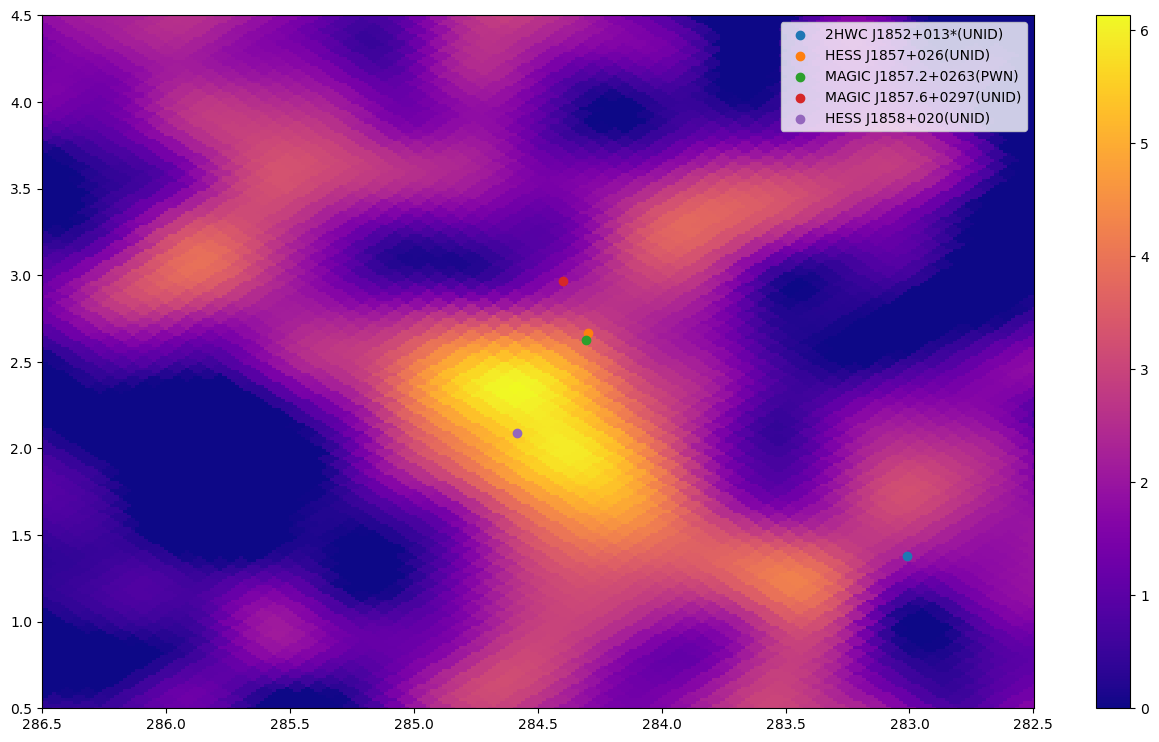

In [19]:
drawgnomview(sigma,284.5,2.5,drawdeg=2)